**2D图绘制**

# 条形图绘制

**1. ax.bar()函数**

* 条形图可以垂直或水平绘制。条形图显示离散类别之间的比较。图表的一根轴显示被比较的具体类别，另一根轴代表测量值。Matplotlib中，条形图用以下的函数来画:

    `ax.bar(x, height, width, bottom, align)`

* 对应参数如下:

  `x - 控制条形图的中心(默认)还是左边缘`

  `height - 标量或标量序列代表条形图的高度`

  `widht - 标量或类数组，可选。条形图的宽度默认为0.8`

  `bottom - 标量或类数组，可选。条形图的Y坐标，默认为None`

  `align - {‘center’, ‘edge’}, 可选，默认’center’`



**2. 绘制单个条形图**

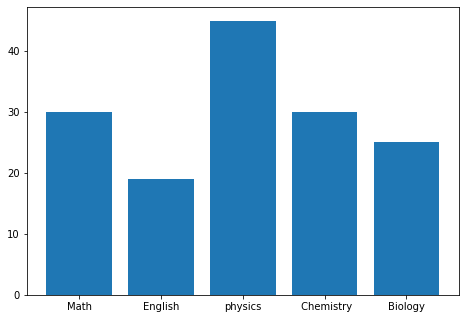

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Math', 'English', 'physics', ' Chemistry', 'Biology']
students = [30,19,45,30,25]
ax.bar(langs, students)
plt.show()

**3. 水平交错条形图绘制**

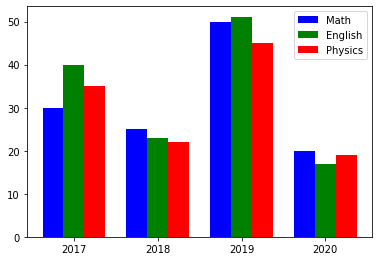

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]

# x轴上坐标的个数，也是data列表里面的列表内的元素个数。4也可以用len(data[0])代替。
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,0.8,0.8])
'''
F1、F2、F3画柱状图，共三个，第一个参数可以认为是labels，第二个参数是各自的y坐标，如果我们想要
在某个柱状图下面设置x轴刻度值，就可以在该柱状图下面用tick_label设置。
'''
F1 = ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
F2 = ax.bar(X + 0.25, data[1], color = 'g', width = 0.25, tick_label=[2017,2018,2019,2020])
F3 = ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

# 给柱状图设置图例，第一个参数是个元组，元组中每个元素代表一个柱状图，第二个参数是对应着的图例的名字。
ax.legend((F1,F2,F3),('Math','English','Physics'))
plt.show()

**4. 多个条形图堆叠绘制**

* ax.bar()中，添加**bottom**用法

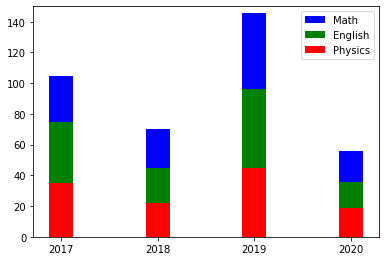

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]])

X = np.arange(len(data[0]))
fig = plt.figure()
ax = fig.add_axes([0,0,0.8,0.8])
ax.set_ylim(0, 150)

# 唯一改动的就是ax.bar中的第一个参数。
F1 = ax.bar(X, data[0], bottom = data[1] + data[2], color = 'b', width = 0.25)
F2 = ax.bar(X, data[1], bottom = data[2],color = 'g', width = 0.25, tick_label=[2017,2018,2019,2020])
F3 = ax.bar(X, data[2], color = 'r', width = 0.25)

ax.legend((F1,F2,F3),('Math','English','Physics'))
plt.show()

**5. 横向条形图绘制** 

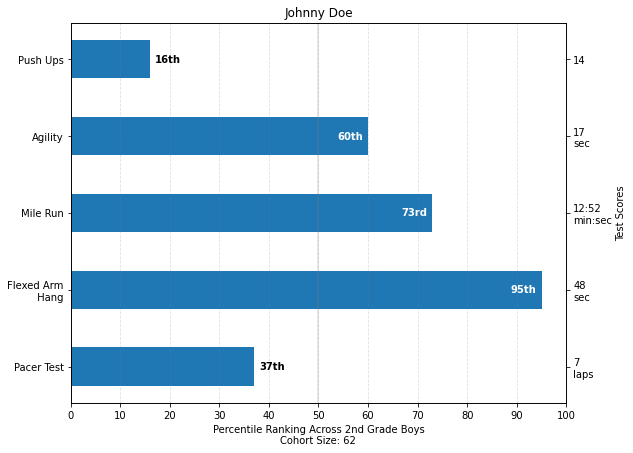

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

np.random.seed(42)

Student = namedtuple('Student', ['name', 'grade', 'gender'])
Score = namedtuple('Score', ['score', 'percentile'])

# GLOBAL CONSTANTS
test_names = ['Pacer Test', 'Flexed Arm\n Hang', 'Mile Run', 'Agility',
              'Push Ups']
test_meta = dict(zip(test_names, ['laps', 'sec', 'min:sec', 'sec', '']))


def attach_ordinal(num):
    """Convert an integer to an ordinal string, e.g. 2 -> '2nd'."""
    suffixes = {str(i): v
                for i, v in enumerate(['th', 'st', 'nd', 'rd', 'th',
                                       'th', 'th', 'th', 'th', 'th'])}

    v = str(num)
    # special case early teens
    if v in {'11', '12', '13'}:
        return v + 'th'
    return v + suffixes[v[-1]]


def format_score(scr, test):
    """
    Build up the score labels for the right Y-axis by first
    appending a carriage return to each string and then tacking on
    the appropriate meta information (i.e., 'laps' vs. 'seconds'). We
    want the labels centered on the ticks, so if there is no meta
    info (like for pushups) then don't add the carriage return to
    the string
    """
    md = test_meta[test]
    if md:
        return '{0}\n{1}'.format(scr, md)
    else:
        return scr


def format_ycursor(y):
    y = int(y)
    if y < 0 or y >= len(test_names):
        return ''
    else:
        return test_names[y]


def plot_student_results(student, scores, cohort_size):
    #  create the figure
    fig, ax1 = plt.subplots(figsize=(9, 7))
    fig.subplots_adjust(left=0.115, right=0.88)
    fig.canvas.set_window_title('Eldorado K-8 Fitness Chart')

    pos = np.arange(len(test_names))

    rects = ax1.barh(pos, [scores[k].percentile for k in test_names],
                     align='center',
                     height=0.5,
                     tick_label=test_names)

    ax1.set_title(student.name)

    ax1.set_xlim([0, 100])
    ax1.xaxis.set_major_locator(MaxNLocator(11))
    ax1.xaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.25)

    # Plot a solid vertical gridline to highlight the median position
    ax1.axvline(50, color='grey', alpha=0.25)

    # Set the right-hand Y-axis ticks and labels
    ax2 = ax1.twinx()

    scoreLabels = [format_score(scores[k].score, k) for k in test_names]

    # set the tick locations
    ax2.set_yticks(pos)
    # make sure that the limits are set equally on both yaxis so the
    # ticks line up
    ax2.set_ylim(ax1.get_ylim())

    # set the tick labels
    ax2.set_yticklabels(scoreLabels)

    ax2.set_ylabel('Test Scores')

    xlabel = ('Percentile Ranking Across {grade} Grade {gender}s\n'
              'Cohort Size: {cohort_size}')
    ax1.set_xlabel(xlabel.format(grade=attach_ordinal(student.grade),
                                 gender=student.gender.title(),
                                 cohort_size=cohort_size))

    rect_labels = []
    # Lastly, write in the ranking inside each bar to aid in interpretation
    for rect in rects:
        # Rectangle widths are already integer-valued but are floating
        # type, so it helps to remove the trailing decimal point and 0 by
        # converting width to int type
        width = int(rect.get_width())

        rankStr = attach_ordinal(width)
        # The bars aren't wide enough to print the ranking inside
        if width < 40:
            # Shift the text to the right side of the right edge
            xloc = 5
            # Black against white background
            clr = 'black'
            align = 'left'
        else:
            # Shift the text to the left side of the right edge
            xloc = -5
            # White on magenta
            clr = 'white'
            align = 'right'

        # Center the text vertically in the bar
        yloc = rect.get_y() + rect.get_height() / 2
        label = ax1.annotate(rankStr, xy=(width, yloc), xytext=(xloc, 0),
                            textcoords="offset points",
                            ha=align, va='center',
                            color=clr, weight='bold', clip_on=True)
        rect_labels.append(label)

    # make the interactive mouse over give the bar title
    ax2.fmt_ydata = format_ycursor
    # return all of the artists created
    return {'fig': fig,
            'ax': ax1,
            'ax_right': ax2,
            'bars': rects,
            'perc_labels': rect_labels}


student = Student('Johnny Doe', 2, 'boy')
scores = dict(zip(
    test_names,
    (Score(v, p) for v, p in
     zip(['7', '48', '12:52', '17', '14'],
         np.round(np.random.uniform(0, 100, len(test_names)), 0)))))
cohort_size = 62  # The number of other 2nd grade boys

arts = plot_student_results(student, scores, cohort_size)

plt.show()

# 饼图绘制

* API: 
  
  `ax.pie(x, explode=None, labels=None, colors=None, autopct=None, shadow=False, startangle=None, radius=None, textprops=None, ...)`

* explode	扇形块远离圆心的举例
  
  labels	数据对应标签
   
  autopct	用于指定每个扇形块标注文本的样式，比如：定义百分数精度
  
  colors	颜色
  
  shadow	阴影
  
  startangle	起始角度，逆时针
  
  radius	饼图半径
  
  textprops	图中文本属性 

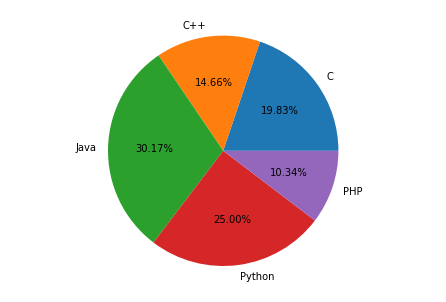

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
ax.pie(students, labels = langs, autopct='%1.2f%%')
plt.show()

# 散点图绘制

* API: 

  `scatter(self, x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, \*, plotnonfinite=False, data=None, \*\*kwargs)`

* x,y - 输入数据
  
  s - 标量或array_like，shape（n，），默认是rcParams ['lines.markersize'] ** 2
  
  c - 颜色
  
  marker - 标记样式
  
  cmap - Colormap，默认值为None
  
  nor	- Normalize，可选，默认值为None
  
  vmin, vmax - scalar，可选，默认值为None



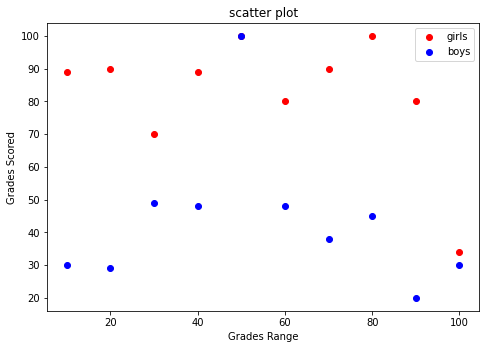

In [ ]:
import matplotlib.pyplot as plt
girls_grades = [89, 90, 70, 89, 100, 80, 90, 100, 80, 34]
boys_grades = [30, 29, 49, 48, 100, 48, 38, 45, 20, 30]
grades_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
a1 = ax.scatter(grades_range, girls_grades, color='r')
a2 = ax.scatter(grades_range, boys_grades, color='b')
ax.set_xlabel('Grades Range')
ax.set_ylabel('Grades Scored')
ax.set_title('scatter plot')
ax.legend((a1,a2),('girls', 'boys'))
plt.show()

# 等高线图绘制

* 等高线图（有时也叫水平图）是在二维平面上显示三维曲面的一种方法。它将y轴上的两个预测变量X Y和一个响应变量Z绘制成等值线图。这些等高线有时被称为z切片或等值线响应值。

* 如果想知道Z的变化是如何作为两个输入X和Y的函数，如Z=f(X,Y)，等高线图是合适的。两个变量函数的等高线或等值线是一条曲线，该函数的数值是恒定的。

* 独立变量x和y通常被限制在一个叫做meshgrid的规则网格中。numpy.meshgrid可以用x值的数组和y值的数组创建一个矩形网格。

* Matplotlib API包含contour()和contourf()函数，分别绘制等高线和填充等高线。这两个函数都需要三个参数x,y和z。


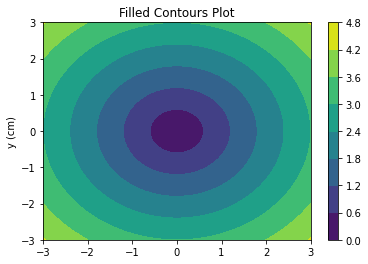

In [1]:
import numpy as np
import matplotlib.pyplot as plt
xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)

X, Y = np.meshgrid(xlist, ylist)

Z = np.sqrt(X**2 + Y**2)
fig,ax=plt.subplots(1,1)

cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
#ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.show()

# quiver(x,y,u,v)

* quiver plot以箭头形式显示速度矢量，在点(x,y)处有分量(u,v)。

* API:

  `quiver(x,y,u,v,c)`

* x - 1D或2D阵列、序列。箭头位置的x坐标
  
  y	- 1D或2D阵列、序列。箭头位置的y坐标
  
  u	- 1D或2D阵列、序列。箭头向量的x分量
  
  v	- 1D或2D阵列、序列。箭头向量的y分量
  
  c -	1D或2D阵列、序列。箭头颜色




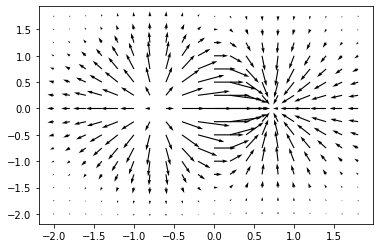

In [2]:
import matplotlib.pyplot as plt
import numpy as np
x,y = np.meshgrid(np.arange(-2, 2, .2), np.arange(-2, 2, .25))
z = x*np.exp(-x**2 - y**2)
# np.gradient(z):用于计算数组z中元素的梯度，当f为多维时，返回每个维度的梯度
v, u = np.gradient(z, .2, .2)
fig, ax = plt.subplots()
q = ax.quiver(x,y,u,v)
plt.show()

# 箱形图和小提琴图绘制

**1. 箱形图**

* 箱形图也被称为胡须图，它显示了一组数据的摘要，包括最小值、第一四分位数、中位数、第三四分位数和最大值。在箱形图中，从第一个四分位数到第三个四分位数画一个箱形。在中位数处有一条垂直线穿过方框。晶须从每个四分位数到最小值或最大值。

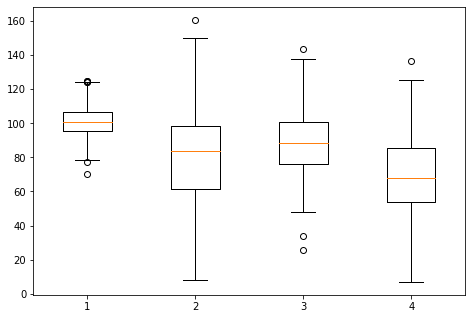

In [3]:
# 创建数据
# 需要三个参数，正态分布的平均数和标准差，以及所需值的数量。
np.random.seed(10)
collectn_1 = np.random.normal(100, 10, 200)
collectn_2 = np.random.normal(80, 30, 200)
collectn_3 = np.random.normal(90, 20, 200)
collectn_4 = np.random.normal(70, 25, 200)

fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0,0,1,1])
# Create the boxplot
data_to_plot = [collectn_1,collectn_2,collectn_3,collectn_4]
bp = ax.boxplot(data_to_plot)
plt.show()

**2. 小提琴图**

* 小提琴图与箱形图类似，但它们也显示不同数值下数据的概率密度。这些图包括一个数据中位数的标记和一个表示四分位数范围的方框，就像标准方框图一样。叠加在这个方框图上的是一个核密度估计。和箱形图一样，小提琴图也是用来表示一个变量分布（或样本分布）在不同 "类别 "之间的比较。

* 小提琴图比普通的箱形图信息量更大。事实上，箱形图只显示摘要统计，如平均数/中位数和四分位数范围，而小提琴图则显示数据的完整分布。

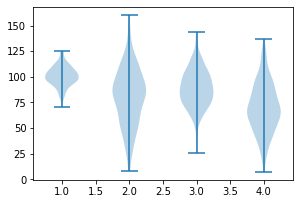

In [4]:
import matplotlib.pyplot as plt

np.random.seed(10)
collectn_1 = np.random.normal(100, 10, 200)
collectn_2 = np.random.normal(80, 30, 200)
collectn_3 = np.random.normal(90, 20, 200)
collectn_4 = np.random.normal(70, 25, 200)

## combine these different collections into a list
data_to_plot = [collectn_1, collectn_2, collectn_3, collectn_4]

# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0.2,0.2,0.6,0.6])

# Create the boxplot
bp = ax.violinplot(data_to_plot)
plt.show()